In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
# Dataset de origem
DS_O = "./data/dataset.csv"
# Dataset Transformado
DS_T = "./data/dataset_transformed.csv"

# Mapeamento dos nomes das variáveis para português
column_mapping = {
    'GENDER': 'Gênero',
    'AGE': 'Idade',
    'SMOKING': 'Fuma',
    'YELLOW_FINGERS': 'Dedos Amarelos',
    'ANXIETY': 'Ansiedade',
    'PEER_PRESSURE': 'Pressão dos Colegas',
    'CHRONIC_DISEASE': 'Doença Crônica',
    'FATIGUE': 'Fadiga',
    'ALLERGY': 'Alergia',
    'WHEEZING': 'Chiado no Peito',
    'ALCOHOL_CONSUMING': 'Consumo de Álcool',
    'COUGHING': 'Tosse',
    'SHORTNESS_OF_BREATH': 'Falta de Ar',
    'SWALLOWING_DIFFICULTY': 'Dificuldade para Engolir',
    'CHEST_PAIN': 'Dor no Peito',
    'LUNG_CANCER': 'Câncer de pulmão',
}

In [2]:
def transform_o():
    """
        Transforma os dados de origem.
        Mapeia as variáveis de classes (1,2) para (0,1)
        Mapeia ('M','F') para (0,1)
        Mapeia ("NO", "YES") para (0,1)
        Salva como novo csv $DS_T o dataframe resultante, se não existente.
    """
    if os.path.exists(DS_T):
        return False
    df = pd.read_csv(DS_O)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = [col[:-1] if col.endswith('_') else col for col in df.columns]

    mapping = {1: 0, 2: 1}
    columns = ['SMOKING', 'YELLOW_FINGERS', 
           'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 
           'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 
           'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 
           'CHEST_PAIN']
    # Mapeando para 0 e 1
    df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
    df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

    df[columns] = df[columns].apply(lambda x: x.map(mapping))
    df.to_csv(DS_T, index=False)
    return True

In [3]:
transform_o()

df = pd.read_csv(DS_T)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
proportions = y.value_counts(normalize=True)

In [4]:
print("Proporção de pessoas com e sem câncer de pulmão no dataset")
print(f"Sem câncer: {proportions[0]}\nCom câncer: {proportions[1]}")

Proporção de pessoas com e sem câncer de pulmão no dataset
Sem câncer: 0.1262135922330097
Com câncer: 0.8737864077669902


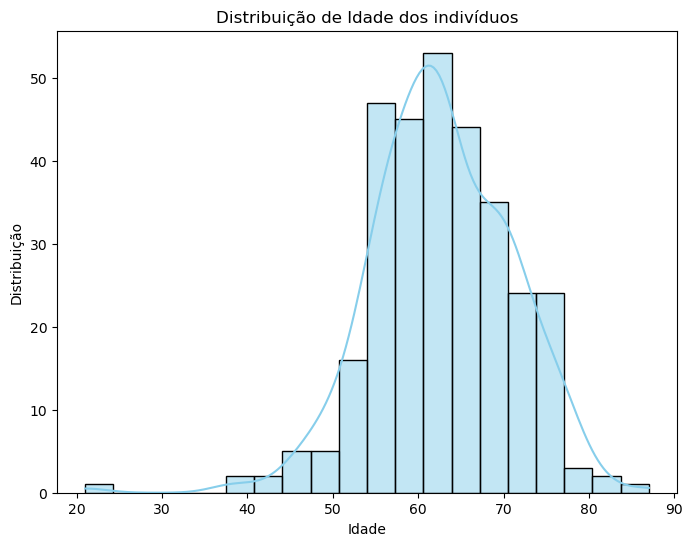

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(X['AGE'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição de Idade dos indivíduos')
plt.xlabel('Idade')
plt.ylabel('Distribuição')
plt.show()


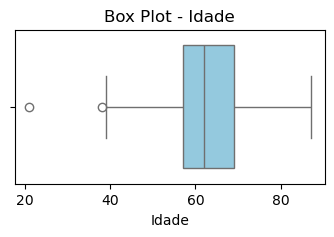

In [6]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=X['AGE'], color='skyblue')
plt.title('Box Plot - Idade')
plt.xlabel('Idade')
plt.show()


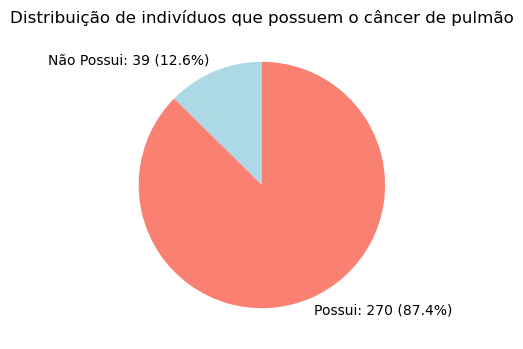

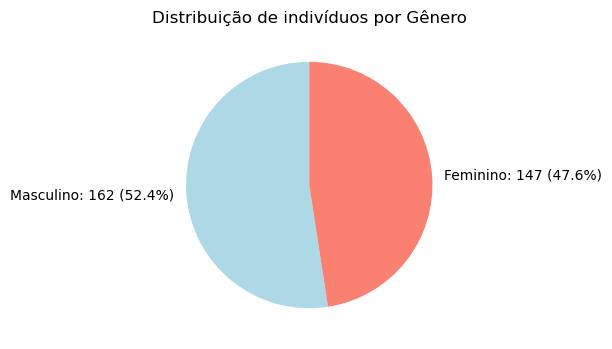

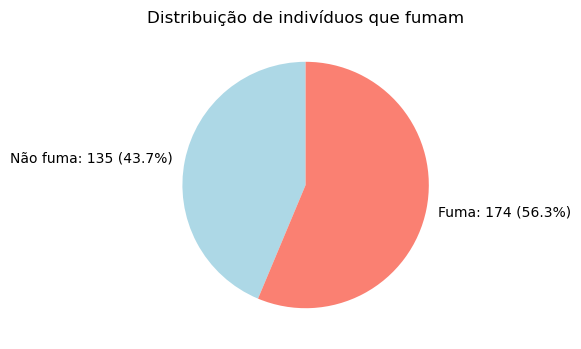

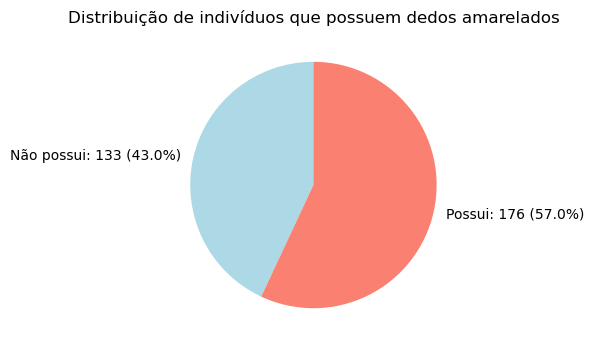

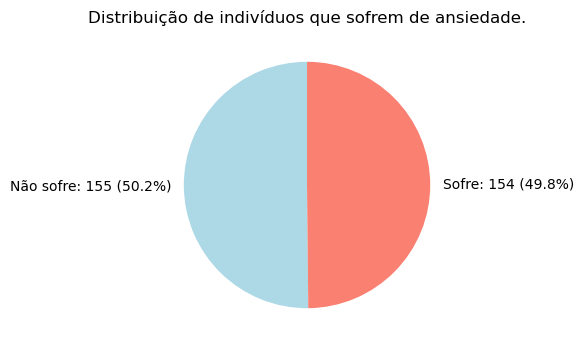

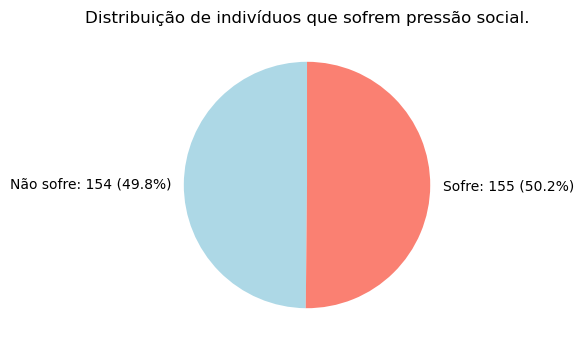

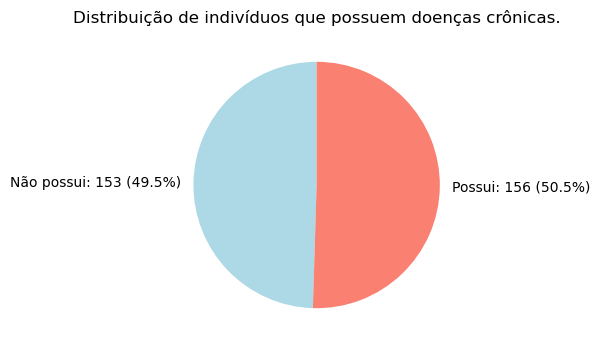

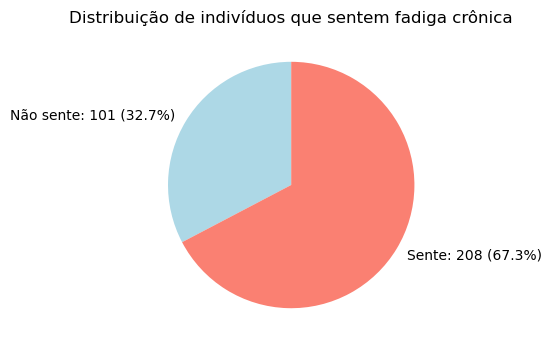

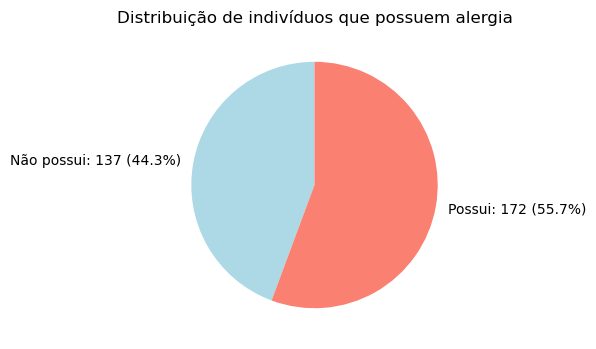

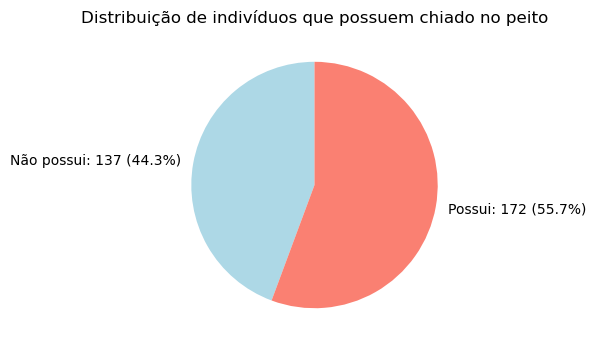

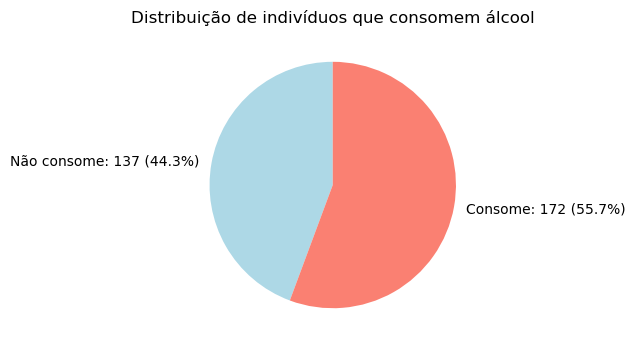

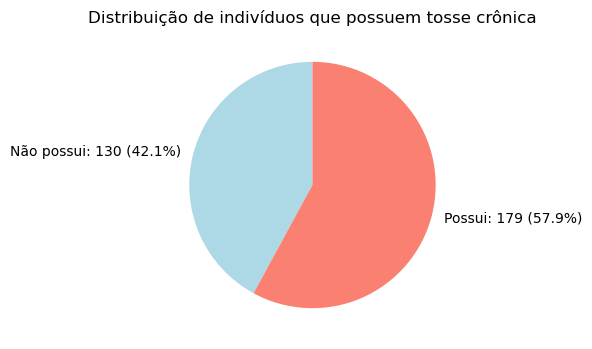

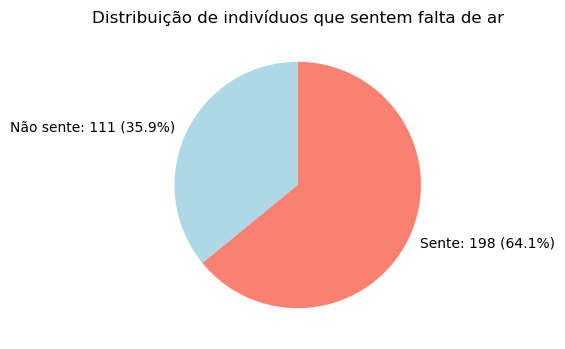

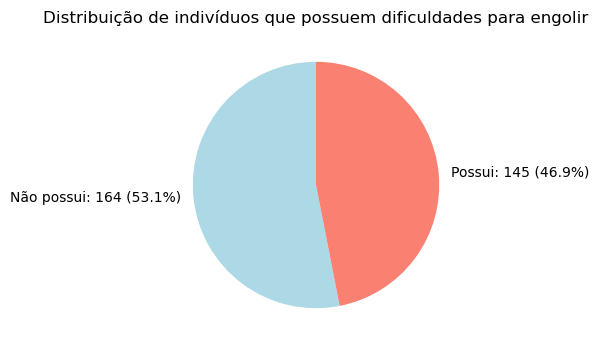

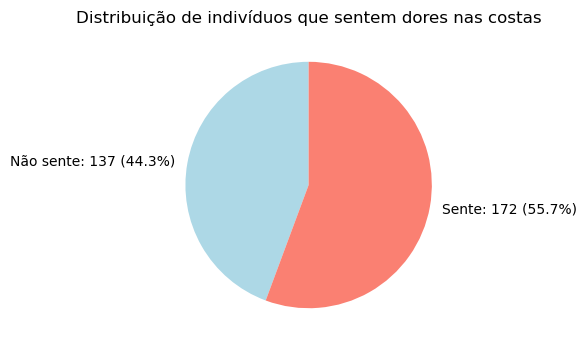

In [23]:
col = [('LUNG_CANCER', 'Não Possui', 'Possui', 'que possuem o câncer de pulmão'),
       ('GENDER', 'Masculino', 'Feminino', 'por Gênero'),
       ('SMOKING', 'Não fuma', 'Fuma', 'que fumam'),
       ('YELLOW_FINGERS', 'Não possui', 'Possui', 'que possuem dedos amarelados'),
       ('ANXIETY', 'Não sofre', 'Sofre', 'que sofrem de ansiedade.'),
       ('PEER_PRESSURE', 'Não sofre', 'Sofre', 'que sofrem pressão social.'),
       ('CHRONIC_DISEASE', 'Não possui', 'Possui', 'que possuem doenças crônicas.'),
       ('FATIGUE', 'Não sente', 'Sente', 'que sentem fadiga crônica'),
       ('ALLERGY', 'Não possui', 'Possui', 'que possuem alergia'),
       ('WHEEZING', 'Não possui', 'Possui', 'que possuem chiado no peito'),
       ('ALCOHOL_CONSUMING', 'Não consome', 'Consome', 'que consomem álcool'),
       ('COUGHING', 'Não possui', 'Possui', 'que possuem tosse crônica'),
       ('SHORTNESS_OF_BREATH', 'Não sente', 'Sente', 'que sentem falta de ar'),
       ('SWALLOWING_DIFFICULTY', 'Não possui', 'Possui', 'que possuem dificuldades para engolir'),
       ('CHEST_PAIN', 'Não sente', 'Sente', 'que sentem dores nas costas'),
      ]

for c in col:
    col_distribution = df[c[0]].value_counts()
    col_labels = [c[1], c[2]]
    
    # para começar pelo index 0
    col_distribution = col_distribution.reindex([0, 1], fill_value=0)
    
    # cálculo da porcentagem
    col_percentage = (col_distribution / col_distribution.sum()) * 100
    
    
    custom_labels = [
        f"{col_labels[i]}: {col_distribution[i]} ({col_percentage[i]:.1f}%)"
        for i in range(len(col_distribution))
    ]
    
    
    plt.figure(figsize=(4, 4))
    plt.pie(col_distribution, labels=custom_labels, startangle=90, colors=['lightblue', 'salmon'])
    plt.title("Distribuição de indivíduos " + c[3])
    
    plt.show()


## Correlação entre as variáveis independentes

                            Gênero     Idade      Fuma  Dedos Amarelos  \
Gênero                    1.000000 -0.021306 -0.036277        0.212959   
Idade                    -0.021306  1.000000 -0.084475        0.005205   
Fuma                     -0.036277 -0.084475  1.000000       -0.014585   
Dedos Amarelos            0.212959  0.005205 -0.014585        1.000000   
Ansiedade                 0.152127  0.053170  0.160267        0.565829   
Pressão dos Colegas       0.275564  0.018685 -0.042822        0.323083   
Doença Crônica            0.204606 -0.012642 -0.141522        0.041122   
Fadiga                    0.083560  0.012614 -0.029575       -0.118058   
Alergia                  -0.154251  0.027990  0.001913       -0.144300   
Chiado no Peito          -0.141207  0.055011 -0.129426       -0.078515   
Consumo de Álcool        -0.454268  0.058985 -0.050623       -0.289025   
Tosse                    -0.133303  0.169950 -0.129471       -0.012640   
Falta de Ar               0.064911 -0.

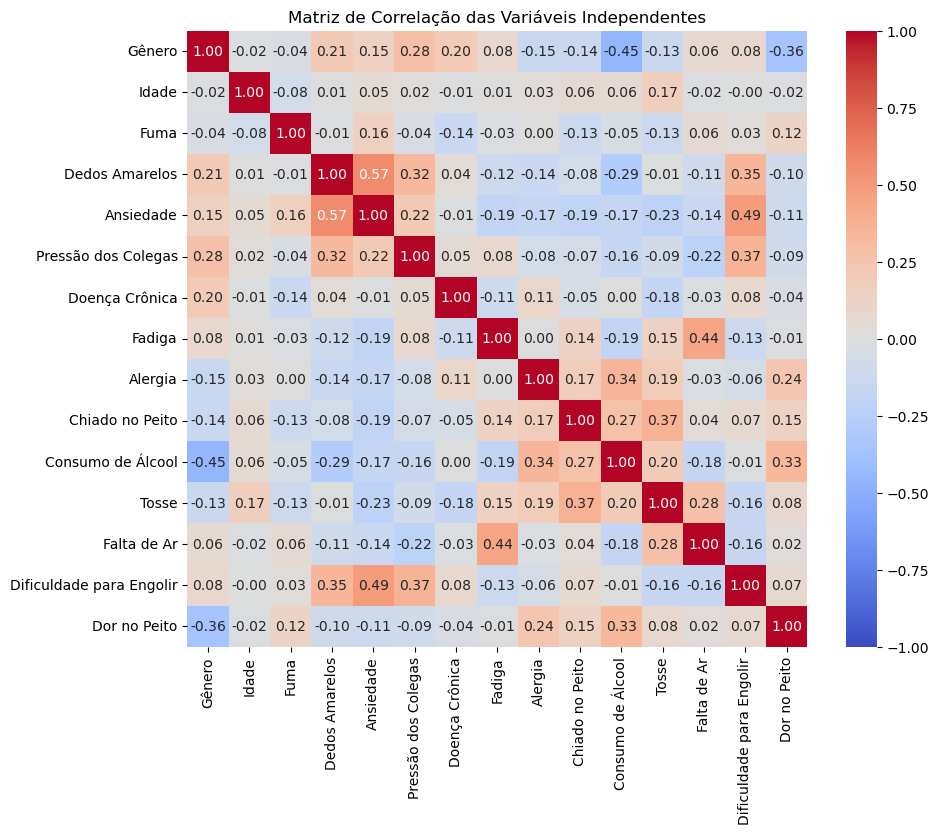

In [34]:
# Renomeando as colunas com o mapeamento
X = X.rename(columns=column_mapping)

# Calcular a correlação entre as variáveis independentes
correlation_matrix = X.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Visualizar a matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Título do gráfico
plt.title('Matriz de Correlação das Variáveis Independentes')
plt.show()


## Correlação entre variáveis e a variável dependente
Utilizamos `df['AGE'].corr(df['LUNG_CANCER'])` para calcular a correlação de Pearson entre a variável numérica `AGE` e a variável binária LUNG_CANCER. O resultado será um valor entre -1 e 1 que nos diz o grau de correlação linear entre as duas variáveis.

Para cada variável binária, usamos `pd.crosstab(df[column], df['LUNG_CANCER'])` para construir uma tabela de contingência. Esta tabela mostra a distribuição conjunta de duas variáveis categóricas, no caso a variável binária e `LUNG_CANCER`.



<Figure size 1200x800 with 0 Axes>

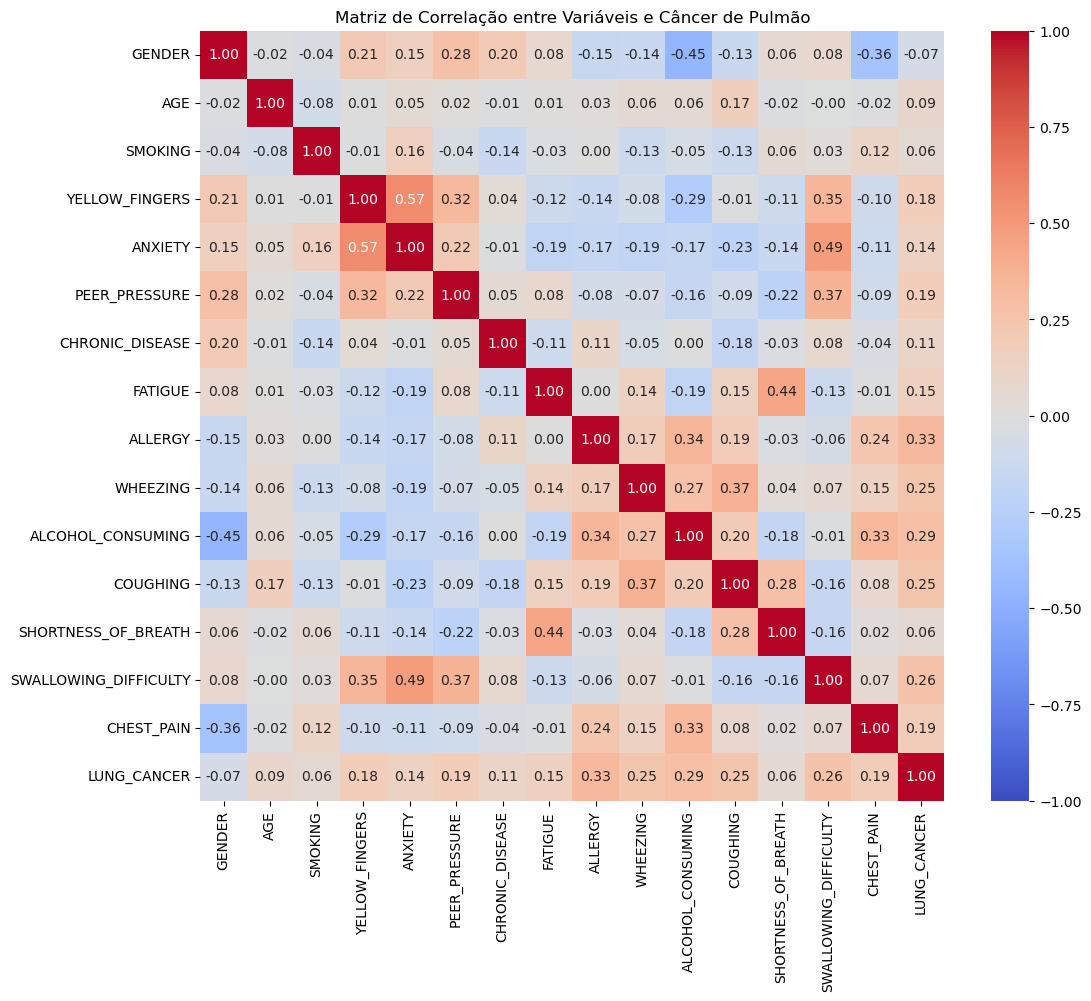

In [49]:
# Configurar para exibição de tabelas e gráficos
plt.figure(figsize=(12, 8))

# 4. Correlação entre todas as variáveis numéricas e a variável dependente (LUNG_CANCER)
# Calculando a correlação entre as variáveis numéricas (AGE e LUNG_CANCER)
correlation_matrix = df.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis e Câncer de Pulmão')
plt.show()


In [50]:
# 1. Correlação de Pearson entre AGE e LUNG_CANCER
age_correlation = df['AGE'].corr(df['LUNG_CANCER'])
print(f'Correlação de Pearson entre Idade e Câncer de Pulmão: {age_correlation:.2f}')
# Exibir o p-valor do teste de significância
print(f'p-valor: {p_value:.4f}')

# Realizar o teste de hipótese
if p_value < 0.05:
    print(f"Há uma correlação significativa entre Idade e Câncer de Pulmão.\n")
else:
    print(f"Não há uma correlação significativa entre Idade e Câncer de Pulmão.\n")



Correlação de Pearson entre Idade e Câncer de Pulmão: 0.09
p-valor: 0.3122
Não há uma correlação significativa entre Idade e Câncer de Pulmão.




Tabela de contingência entre Fuma e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
SMOKING              
Não           20  115
Sim           19  155

Teste Qui-quadrado para Fuma:
Chi2: 0.72, p-valor: 0.3953
Não há uma associação significativa entre Fuma e Câncer de Pulmão.



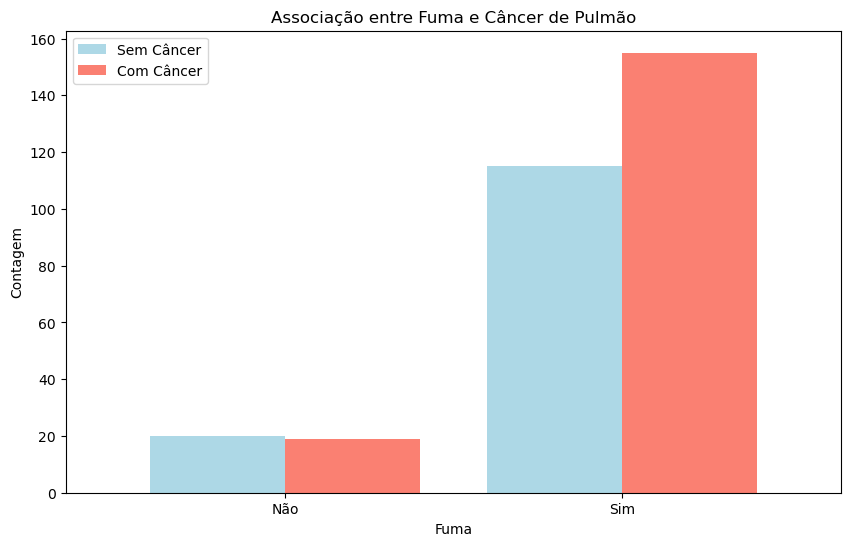


Tabela de contingência entre Dedos Amarelos e Câncer de Pulmão:
LUNG_CANCER     Não  Sim
YELLOW_FINGERS          
Não              26  107
Sim              13  163

Teste Qui-quadrado para Dedos Amarelos:
Chi2: 9.09, p-valor: 0.0026
Há uma associação significativa entre Dedos Amarelos e Câncer de Pulmão.



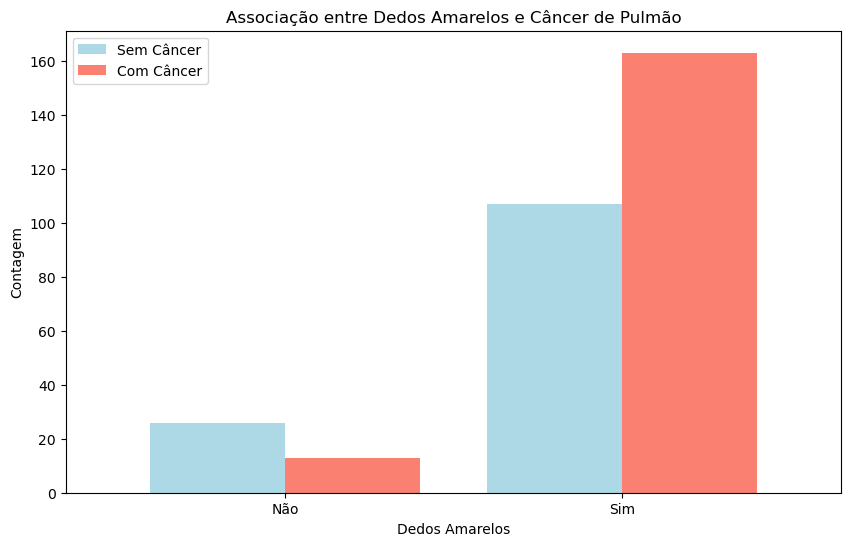


Tabela de contingência entre Ansiedade e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
ANXIETY              
Não           27  128
Sim           12  142

Teste Qui-quadrado para Ansiedade:
Chi2: 5.65, p-valor: 0.0175
Há uma associação significativa entre Ansiedade e Câncer de Pulmão.



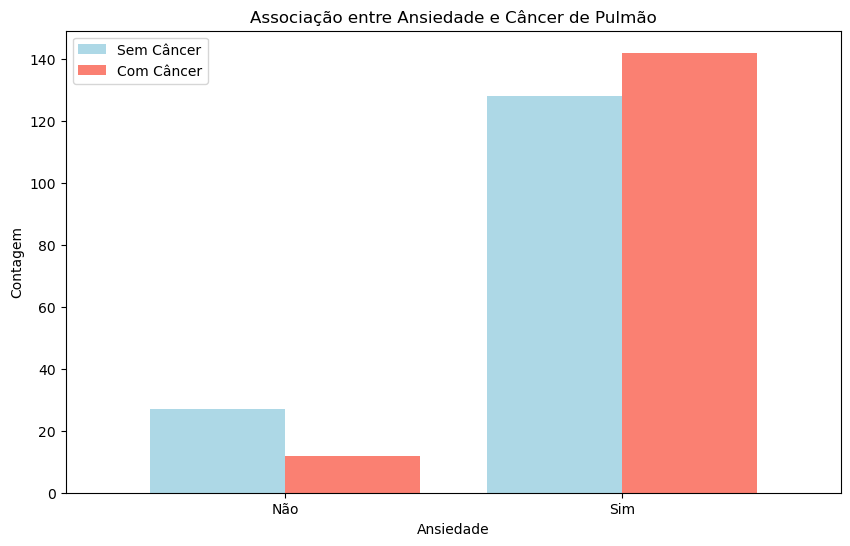


Tabela de contingência entre Pressão dos Colegas e Câncer de Pulmão:
LUNG_CANCER    Não  Sim
PEER_PRESSURE          
Não             29  125
Sim             10  145

Teste Qui-quadrado para Pressão dos Colegas:
Chi2: 9.64, p-valor: 0.0019
Há uma associação significativa entre Pressão dos Colegas e Câncer de Pulmão.



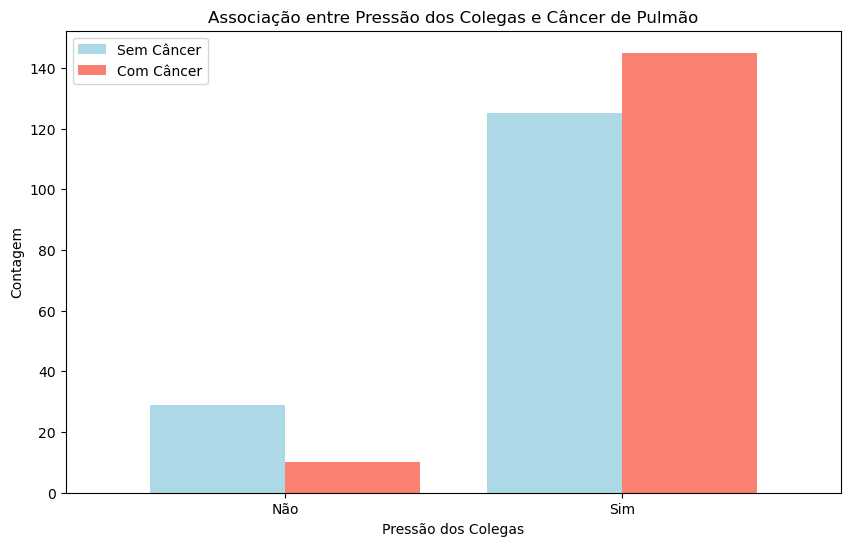


Tabela de contingência entre Doença Crônica e Câncer de Pulmão:
LUNG_CANCER      Não  Sim
CHRONIC_DISEASE          
Não               25  128
Sim               14  142

Teste Qui-quadrado para Doença Crônica:
Chi2: 3.16, p-valor: 0.0754
Não há uma associação significativa entre Doença Crônica e Câncer de Pulmão.



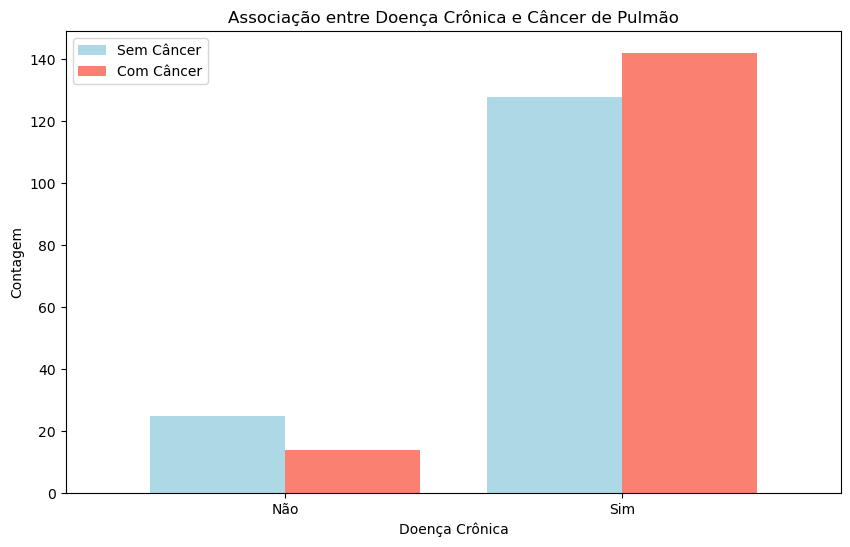


Tabela de contingência entre Fadiga e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
FATIGUE              
Não           20   81
Sim           19  189

Teste Qui-quadrado para Fadiga:
Chi2: 6.08, p-valor: 0.0137
Há uma associação significativa entre Fadiga e Câncer de Pulmão.



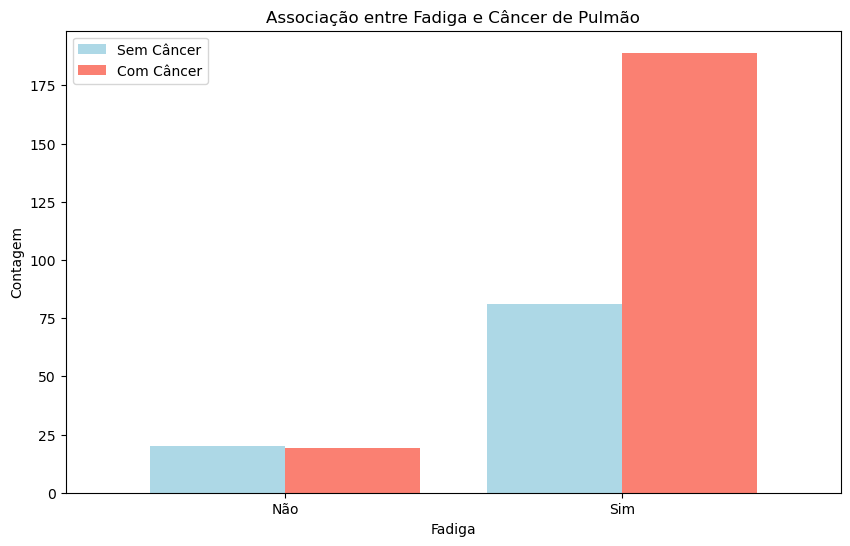


Tabela de contingência entre Alergia e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
ALLERGY              
Não           34  103
Sim            5  167

Teste Qui-quadrado para Alergia:
Chi2: 31.24, p-valor: 0.0000
Há uma associação significativa entre Alergia e Câncer de Pulmão.



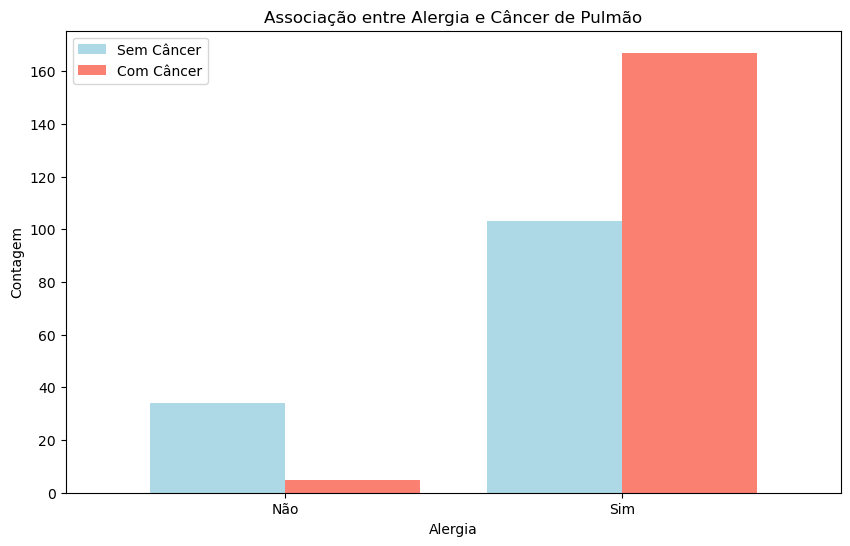


Tabela de contingência entre Chiado no Peito e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
WHEEZING             
Não           30  107
Sim            9  163

Teste Qui-quadrado para Chiado no Peito:
Chi2: 17.72, p-valor: 0.0000
Há uma associação significativa entre Chiado no Peito e Câncer de Pulmão.



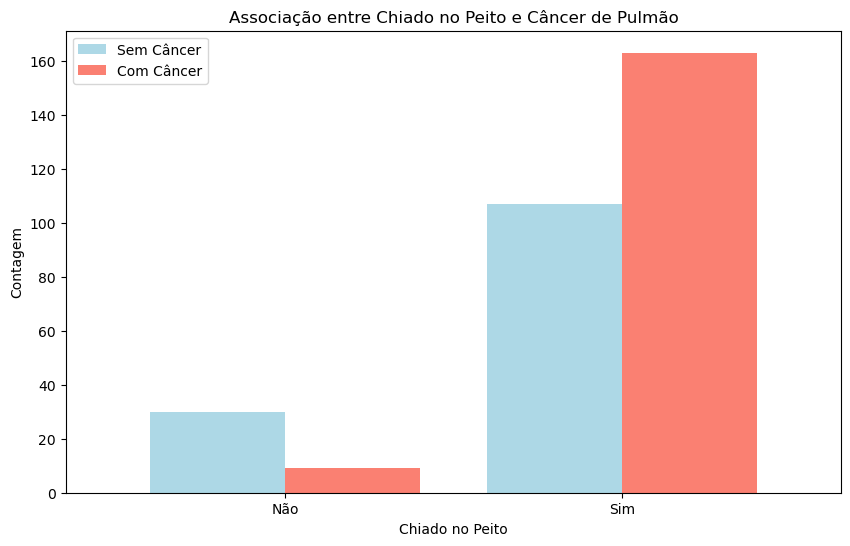


Tabela de contingência entre Consumo de Álcool e Câncer de Pulmão:
LUNG_CANCER        Não  Sim
ALCOHOL_CONSUMING          
Não                 32  105
Sim                  7  165

Teste Qui-quadrado para Consumo de Álcool:
Chi2: 24.01, p-valor: 0.0000
Há uma associação significativa entre Consumo de Álcool e Câncer de Pulmão.



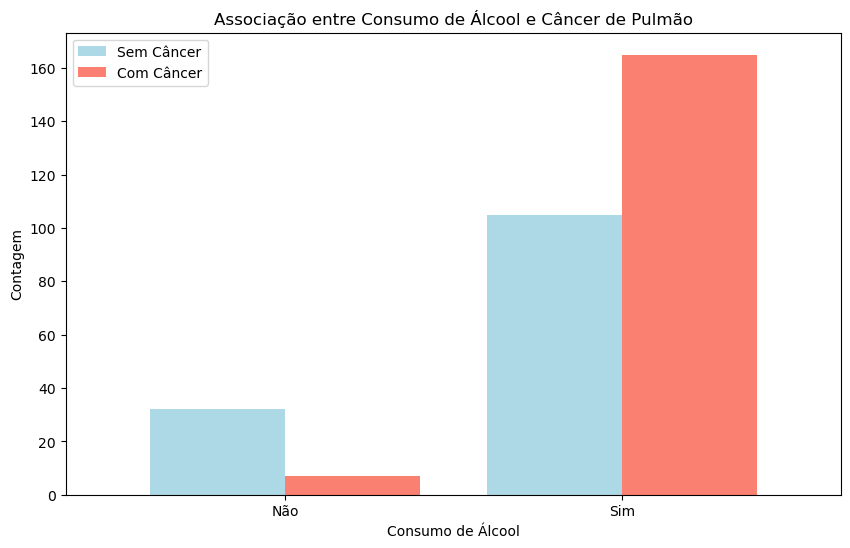


Tabela de contingência entre Tosse e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
COUGHING             
Não           29  101
Sim           10  169

Teste Qui-quadrado para Tosse:
Chi2: 17.61, p-valor: 0.0000
Há uma associação significativa entre Tosse e Câncer de Pulmão.



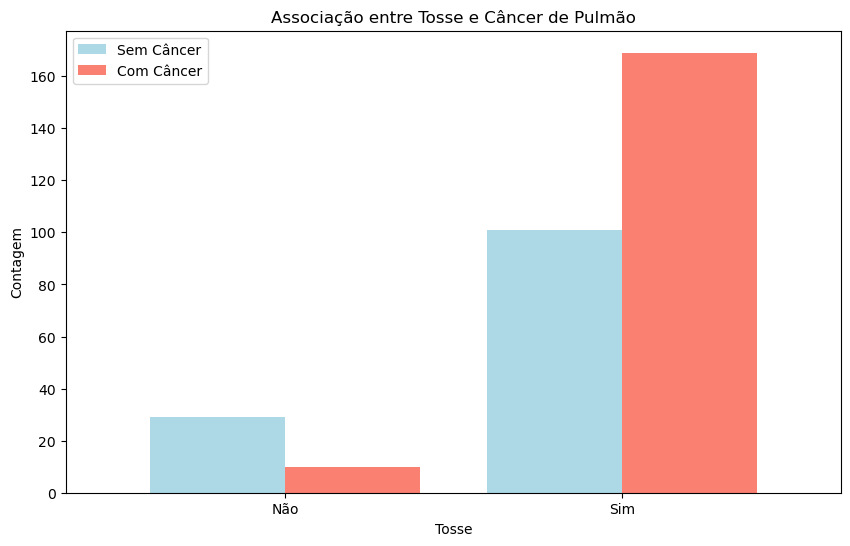


Tabela de contingência entre Falta de Ar e Câncer de Pulmão:
LUNG_CANCER          Não  Sim
SHORTNESS_OF_BREATH          
Não                   17   94
Sim                   22  176

Teste Qui-quadrado para Falta de Ar:
Chi2: 0.79, p-valor: 0.3739
Não há uma associação significativa entre Falta de Ar e Câncer de Pulmão.



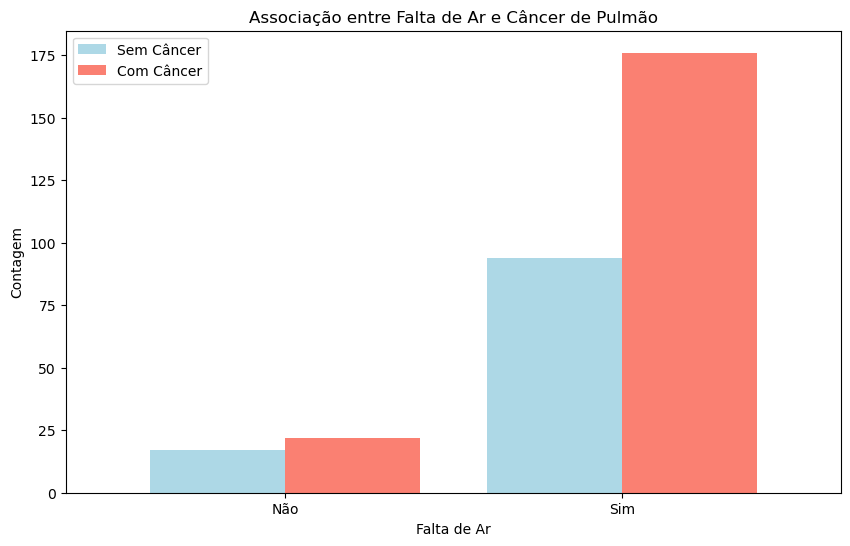


Tabela de contingência entre Dificuldade para Engolir e Câncer de Pulmão:
LUNG_CANCER            Não  Sim
SWALLOWING_DIFFICULTY          
Não                     34  130
Sim                      5  140

Teste Qui-quadrado para Dificuldade para Engolir:
Chi2: 19.31, p-valor: 0.0000
Há uma associação significativa entre Dificuldade para Engolir e Câncer de Pulmão.



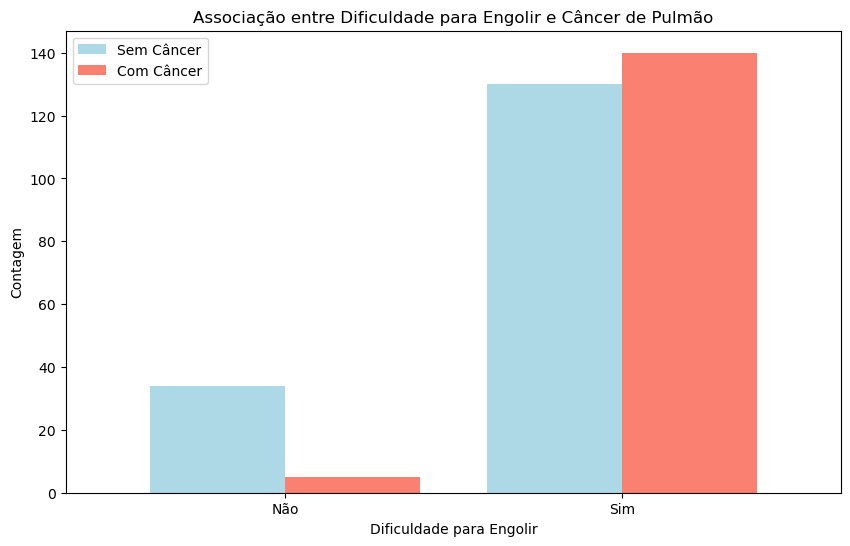


Tabela de contingência entre Dor no Peito e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
CHEST_PAIN           
Não           27  110
Sim           12  160

Teste Qui-quadrado para Dor no Peito:
Chi2: 10.08, p-valor: 0.0015
Há uma associação significativa entre Dor no Peito e Câncer de Pulmão.



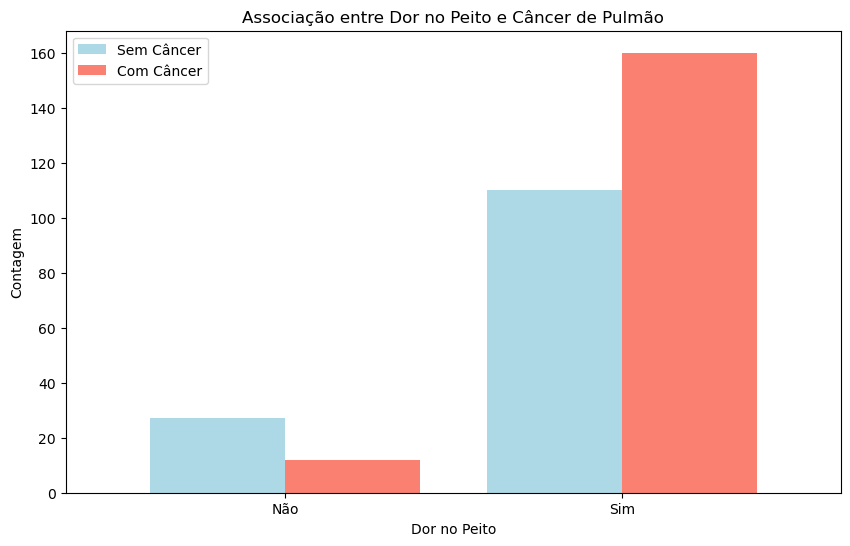


Tabela de contingência entre Gênero e Câncer de Pulmão:
LUNG_CANCER  Não  Sim
GENDER               
Masculino     17  145
Feminino      22  125

Teste Qui-quadrado para Gênero:
Chi2: 1.02, p-valor: 0.3122
Não há uma associação significativa entre Gênero e Câncer de Pulmão.



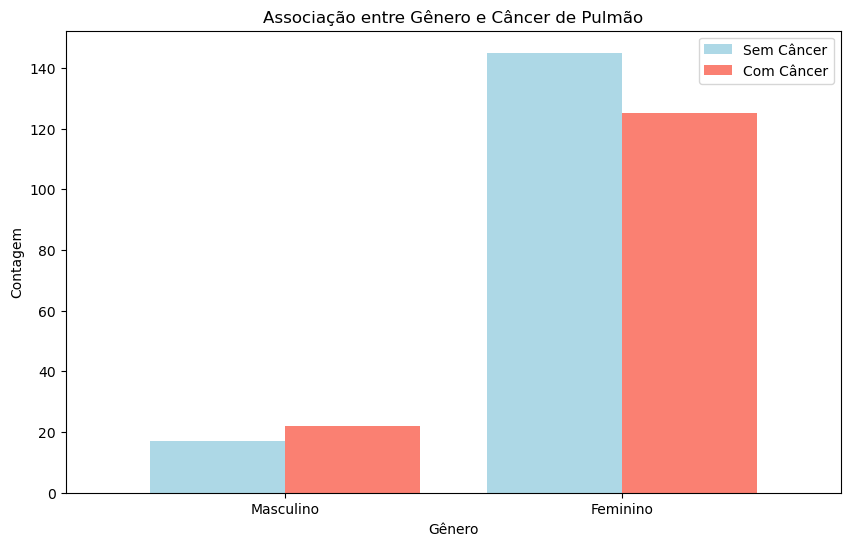

In [74]:
# Mapeamento para "Não" e "Sim"
binary_map = None

# Criação de uma cópia do DataFrame e substituição dos valores binários
df_mapped = df.copy()
df_mapped = df_mapped.replace({0: 'Não', 1: 'Sim'})

# Lista de colunas binárias para análise
binary_columns = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 
    'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'GENDER'
]

# Função para criar o gráfico de barras agrupadas
def plot_grouped_bar_chart(contingency_table, column):
    # Reshape para formatar como barras agrupadas
    contingency_table = contingency_table.T
    contingency_table.columns = ['Sem Câncer', 'Com Câncer']
    
    # Plotando barras agrupadas
    ax = contingency_table.plot(kind='bar', figsize=(10, 6), stacked=False, color=['lightblue', 'salmon'], width=0.8)
    ax.set_title(f'Associação entre {column_mapping[column]} e Câncer de Pulmão')
    ax.set_ylabel('Contagem')
    ax.set_xlabel(column_mapping[column])
    
    if column == 'GENDER':
        contingency_table.index = contingency_table.index.map(lambda x: 'Masculino' if x == 'Não' else 'Feminino')
    # Ajustando os rótulos
    ax.set_xticklabels(contingency_table.index, rotation=0)
    
    plt.xticks(rotation=0)  # Assegura que os rótulos não fiquem inclinados
    plt.show()

# Gerando as tabelas de contingência e os gráficos
for column in binary_columns:
    contingency_table = pd.crosstab(df_mapped[column], df_mapped['LUNG_CANCER'])
    if column == 'GENDER':
        contingency_table.index = contingency_table.index.map(lambda x: 'Masculino' if x == 'Não' else 'Feminino')
    print(f'\nTabela de contingência entre {column_mapping[column]} e Câncer de Pulmão:')
    print(contingency_table)
    print()

    # Teste Qui-quadrado
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f'Teste Qui-quadrado para {column_mapping[column]}:')
    print(f'Chi2: {chi2:.2f}, p-valor: {p_value:.4f}')
    
    if p_value < 0.05:
        print(f"Há uma associação significativa entre {column_mapping[column]} e Câncer de Pulmão.\n")
    else:
        print(f"Não há uma associação significativa entre {column_mapping[column]} e Câncer de Pulmão.\n")

    # Gerar gráfico de barras agrupadas
    plot_grouped_bar_chart(contingency_table, column)
